# 2. Рекомендательная система на базе корреляции Пирсона

Использование рекомендаций на основе только на общей популярности продукта не обеспечивает персонального подхода к потребителямэ Мы разработаем рекомендательную систему на основе показателя корреляции, которая будут давать рекомендации на основе сходства товаров (в данном случае, книг) с предпочтениями конкретного читателя. Основная идея такой системы заключается в том, что если вам нравится какой-либо предмет (продукт), то вам, скорее всего, понравится и предмет, похожий на него. 
Рекомендация на основе корреляции — это одна из самых простых рекомендаций на основе алгоритма совместной фильтрации (collaborative filtering).

В качестве меры сходства товаров в нашей рекомендательной системе мы собираемся использовать корреляцию Пирсона. Эта система рекомендаций будет использовать сходство на основе элементов; сопоставлять элементы на основе оценок пользователей.
Как и в прошлом примере используем библиотеки Pandas и NumPy

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np

In [2]:
# Считываем файлы данных
data = pd.read_csv('listing.csv', encoding = 'latin-1')
books = pd.read_csv('books.csv', encoding = 'latin-1')

In [3]:
# Проверяем структуру таблицы, используя функцию head
books.head()

,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,0
1,590,4.31,7821.0,3466,5
2,4264,4.08,3836.0,3453,5
3,3361,3.52,1245.0,3453,4
4,4535,4.13,3107.0,3453,0


In [4]:
# Рассчитываем средние рейтинги книг, группируя строки по номеру книги
rating = pd.DataFrame(books.groupby('book_id')['no_of_ratings'].mean())
rating.head()

,no_of_ratings
book_id,
6,953.0
7,2012.0
9,172.0
15,118.0
21,3916.0


In [5]:
# выведем детализацию статистики рейтингов книг
rating.describe()

,no_of_ratings
count,708.000000
mean,2040.384181
std,2666.449960
min,0.000000
25%,90.750000
50%,629.000000
75%,3225.250000
max,9936.000000


In [6]:
# отсортируем книги на основании рассчитанных значений рейтингов книг
rating.sort_values('no_of_ratings', ascending=False).head()

,no_of_ratings
book_id,
4755,9936.0
2409,9768.0
4696,9754.0
2194,9754.0
1616,9542.0


In [7]:
# Подготовим таблицу данных для анализа
user_rating= pd.pivot_table(data=books, values='user_rating', index='user_id', columns='book_id')
user_rating.head()

book_id,6,7,9,15,21,29,43,45,47,61,...,4931,4941,4942,4968,4971,4975,4978,4991,4995,4999
user_id,,,,,,,,,,,,,,,,,,,,,
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Коэффициент корреляции Пирсона
**Критерий корреляции Пирсона** – метод параметрической статистики, позволяющий определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость. Другими словами, критерий корреляции Пирсона позволяет определить, изменяется ли (возрастает или уменьшается) один показатель в ответ на изменения другого? В статистических расчетах и выводах коэффициент корреляции обычно обозначается как **r**<sub>xy</sub> или **R**<sub>xy</sub>.
Формула расчета выборочной корреляции Пирсона:
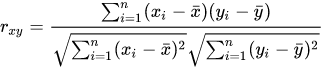

In [8]:
# Рассчитаем корреляционную матрицу по всему набору книг 
correlation_matrix  = user_rating.corr(method='pearson')
correlation_matrix.head(10)

book_id,6,7,9,15,21,29,43,45,47,61,...,4931,4941,4942,4968,4971,4975,4978,4991,4995,4999
book_id,,,,,,,,,,,,,,,,,,,,,
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.944911,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# отберем пользователей, которые оценили эту конкретную книгу, убедимся, что рейтинг не равен нулю
OneManOut_rating = user_rating[4755]
OneManOut_rating[OneManOut_rating>=0]

user_id
577     2.0
3472    4.0
3476    2.0
3483    3.0
Name: 4755, dtype: float64

In [10]:
# оценим сходство с использованием корреляции Пирсона
similar_to_OneManOut = user_rating.corrwith(OneManOut_rating)

corr_OneManOut = pd.DataFrame(similar_to_OneManOut, columns=['PearsonR'])
corr_OneManOut.dropna(inplace=True)
corr_OneManOut.head()

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,PearsonR
book_id,
9,-0.981981
481,-1.000000
493,1.000000
535,-1.000000
755,1.000000


In [11]:
OneManOut_corr_summary = corr_OneManOut.join(rating)
# выведем самые похожие книги, отсортировав их при равном сходстве по рейтингу книги
most_rated_books=OneManOut_corr_summary.sort_values(by = ['PearsonR', 'no_of_ratings'], ascending=False).head(10)
detail = pd.merge(most_rated_books, data, on='book_id')
detail

,book_id,PearsonR,no_of_ratings,genre,name,author
0,4755,1.0,9936.0,Law,One Man Out: Curt Flood versus Baseball (Landm...,Robert M. Goldman
1,2900,1.0,2027.0,Travel,Robert Adams: The New West,NaN
2,2629,1.0,635.0,Travel,Moroccan Arabic: Lonely Planet Phrasebook,Dan Bacon
3,4571,1.0,323.0,Teen & Young Adult,The Story of the Tampa Bay Buccaneers (NFL Tod...,Sara Gilbert
4,493,1.0,211.0,"Health, Fitness & Dieting",The Gene Makeover: The 21st Century Anti-Aging...,Vincent C. Giampapa
5,4854,1.0,8818.0,Computers & Technology,Take Back Your Life!: Using Microsoft Office O...,Sally McGhee
6,3720,1.0,8455.0,Travel,"Laos 1:600,000 Travel Map, waterproof, GPS-com...",Reise Knowhow
7,1676,1.0,5374.0,Science & Math,"Rare Earth Minerals: Chemistry, Origin and Ore...",A.P. Jones
8,3708,1.0,5244.0,Christian Books & Bibles,"The Bible, Rocks and Time: Geological Evidence...",Davis A. Young
9,2595,1.0,2869.0,Religion & Spirituality,When Zarathustra Spoke: The Reformation Of Neo...,Mary Settegast


Мы вывели список книг с самыми высокими рейтингами в нашем наборе данных. На первое место попала книга **One Man Out: Curt Flood Versus Baseball** , относится к жанру права, но наш механизм рекомендаций дает нам смешанные рекомендации, включая путешествия, право и т. д. Это потому, что мы используем для рекомендаций только соотношение между рейтингами. Эта книга была оценена 4 раза в нашем наборе данных и поэтому была самой первой рекомендованной нашей системой рекомендаций. Это означает, что наш рекомендатель работает.